In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

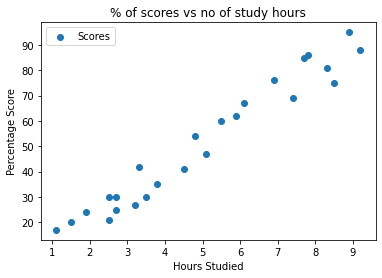

In [7]:
# Plotting the score distribution
plt.scatter(x="Hours",y="Scores",data=df)
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title("% of scores vs no of study hours")
plt.legend()
plt.show()

In [9]:
# Dividing the data into attributes (inputs) and labels (outputs) using .iloc[]
X = df.iloc [:, :-1].values
y = df.iloc [:, 1].values


# X = df.Hours  
# y = df.Scores

# X=np.array(X).reshape(-1, 1)
# y=np.array(y).reshape(-1, 1)

In [10]:
# Splitting data into training and test sets 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [11]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression  


reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training completed")

Training completed


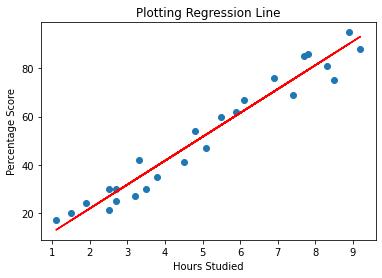

In [12]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color="red");
plt.title("Plotting Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [13]:
print(reg.intercept_)
print(reg.coef_)

2.018160041434662
[9.91065648]


In [14]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparing Actual vs Predicted
actvspred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
actvspred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
#MODEL EVALUATION
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error (y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error (y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt (metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
